# Определение перспективного тарифа для телеком-компании
    
**Название проекта**   
Определение перспективного тарифа для телеком-компании.

**Описание исследования.**
Сделать предварительный анализ тарифов на небольшой выборке клиентов, чтобы понять, какой тариф приносит больше денег и скорректировать рекламный бюджет. 
    
**Цель исследования.**
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
    
**Задачи исследования.**
- выявить в данных проблемы;
- подготовить данные к анализу;
- построить и интерпретировать графики для распределения;
- рассчитать стандартное отклонение и дисперсию;
- сформулировать нулевую и альтернативную гипотезы;
- проверить гипотезы.

**Исходные данные.**

**Таблица users (информация о пользователях):**
    
user_id — уникальный идентификатор пользователя
    
first_name — имя пользователя
    
last_name — фамилия пользователя
    
age — возраст пользователя (годы)
    
reg_date — дата подключения тарифа (день, месяц, год)
    
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    
city — город проживания пользователя
    
tarif — название тарифного плана
    
**Таблица calls (информация о звонках):**
    
id — уникальный номер звонка
    
call_date — дата звонка
    
duration — длительность звонка в минутах
    
user_id — идентификатор пользователя, сделавшего звонок
    
    
**Таблица messages (информация о сообщениях):**
    
id — уникальный номер сообщения
    
message_date — дата сообщения
    
user_id — идентификатор пользователя, отправившего сообщение
    
    
**Таблица internet (информация об интернет-сессиях):**
    
id — уникальный номер сессии
    
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    
session_date — дата интернет-сессии
    
user_id — идентификатор пользователя
    
    
**Таблица tariffs (информация о тарифах):**
    
tariff_name — название тарифа
    
rub_monthly_fee — ежемесячная абонентская плата в рублях
    
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    
messages_included — количество сообщений в месяц, включённых в абонентскую плату
    
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    
rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
  
</div>

  
**Данное исследование разделим на несколько частей.**

[Часть 1. Изучение общей информации.](#section_1)
    
[Часть 2. Подготовка данных.](#section_2)
    
[Часть 3. Анализ данных.](#section_3)

**Часть 1. Изучение общей информации**
<a id='section_1'></a>

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import warnings
import math
from scipy import stats as st

data_tariffs = pd.read_csv('_.csv')
data_tariffs.info()
display(data_tariffs.head())

data_users = pd.read_csv('_.csv')
data_users.info()
display(data_users.head())

data_calls = pd.read_csv('_.csv')
data_calls.info()
display(data_calls.head())

data_internet = pd.read_csv('_.csv') 
data_internet.info()
display(data_internet.head())

data_messages = pd.read_csv('_.csv')
data_messages.info()
display(data_messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Часть 2. Подготовка данных**
<a id='section_2'></a>

In [2]:
data_tariffs.head() 
data_tariffs.info() 
data_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Названия всех столбцов совпадают с описанием, стилистически названия верны.
По типам данных в этом месте не меняла бы ничего. Все цены указываются в рублях без копеек. Секунды округляются до минут.
Не вижу ошибок в этом файле. Пропусков в данных нет.

In [3]:
data_users.head() 
data_users.info() 
data_users['user_id'] = data_users['user_id'].astype('object')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

display(data_users.head())

data_users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


Названия всех столбцов совпадают с описанием, стилистически названия верны.
Пропуски в столбце 'churn_date'. Всего 7,6 % абонентов выборки перестали пользоваться услугами оператора. 
Пропуски означают действующих клиентов. Их менять не будем.
Проверяем, что замена сработала.
Не вижу ошибок в этом файле. Предпосылок менять все буквы на низкий регистр тоже не вижу.

In [4]:
data_calls.head() 
data_calls.info() 

data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

data_calls['duration'] = np.ceil(data_calls['duration']).astype('int64')

data_calls.info()

data_calls_total = data_calls.pivot_table(
    index = ['user_id', 'month'],
    values = ['duration', 'id'],
    aggfunc ={'duration':sum, 'id':'count'}
)

data_calls_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


duration  id
user_id month              
1000    5           159  22
        6           172  43
        7           340  47
        8           408  52
        9           466  58

Названия всех столбцов совпадают с описанием, стилистически названия верны. 
Первые 4 цифры id звонка равны user_id (может быть нам это пригодится).
Пропусков в данных нет. 

In [5]:
data_internet.head() 
data_internet.info()
data_internet['user_id'] = data_internet['user_id'].astype('object')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet.info()
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

data_internet.drop('Unnamed: 0', inplace=True, axis=1)
data_internet.head()

data_internet_total = data_internet.pivot_table(
    index = ['user_id', 'month'],
    values = ['id', 'mb_used'],
    aggfunc = {'mb_used':sum, 'id':'count'}
)

data_internet_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), obje

id   mb_used
user_id month              
1000    5       5   2253.49
        6      49  23233.77
        7      29  14003.64
        8      29  14055.93
        9      27  14568.91

Названия всех столбцов совпадают с описанием кроме Unnamed:0, стилистически названия верны. По ошибкам в этом файле: Судя по названию столбца Unnamed:0 он задумывался как счётчик значений с пропущенными id.
Значения этого столбца повторяют индексы. На данном этапе думаю, что смысловой нагрузки он не несёт и можно удалить без потерь.

In [6]:
data_messages.head() 
data_messages.info()
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['user_id'] = data_messages['user_id'].astype('object')
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages.info()
data_messages.head(50)
data_messages.tail(50)

data_messages_total = data_messages.pivot_table(
    index = ['user_id', 'month'],
    values = ['id'],
    aggfunc = 'count'
)

data_messages_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  object        
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ MB


id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

Названия всех столбцов совпадают с описанием, стилистически названия верны. Не вижу ошибок в этом файле

In [7]:
data_calls_total.rename(columns = {'id':'calls_number'}, inplace=True)
data_internet_total.rename(columns = {'id':'sessions_number'}, inplace=True)
data_messages_total.rename(columns = {'id':'messages_number'}, inplace=True)

data_total = data_calls_total.merge(data_internet_total, 
    on = ['user_id', 'month'], how = 'outer').merge(data_messages_total, 
    on = ['user_id', 'month'], how = 'outer')
    
data_total.info() 
display(data_total.head())

data_total['duration'] = data_total['duration'].fillna(0)
data_total['sessions_number'] = data_total['sessions_number'].fillna(0)
data_total['mb_used'] = data_total['mb_used'].fillna(0)
data_total['calls_number'] = data_total['calls_number'].fillna(0)
data_total['messages_number'] = data_total['messages_number'].fillna(0)

data_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1489, 12)
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         3174 non-null   float64
 1   calls_number     3174 non-null   float64
 2   sessions_number  3203 non-null   float64
 3   mb_used          3203 non-null   float64
 4   messages_number  2717 non-null   float64
dtypes: float64(5)
memory usage: 155.5 KB


duration  calls_number  sessions_number   mb_used  \
user_id month                                                      
1000    5         159.0          22.0              5.0   2253.49   
        6         172.0          43.0             49.0  23233.77   
        7         340.0          47.0             29.0  14003.64   
        8         408.0          52.0             29.0  14055.93   
        9         466.0          58.0             27.0  14568.91   

               messages_number  
user_id month                   
1000    5                 22.0  
        6                 60.0  
        7                 75.0  
        8                 81.0  
        9                 57.0

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1489, 12)
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         3214 non-null   float64
 1   calls_number     3214 non-null   float64
 2   sessions_number  3214 non-null   float64
 3   mb_used          3214 non-null   float64
 4   messages_number  3214 non-null   float64
dtypes: float64(5)
memory usage: 155.5 KB


После  получаем, что есть пропущенные значения во всех столбцах.
Это похоже на реальную картину вещей: не все абоненты пользуются сообщениями и телефонными разговорами в век интернета. Не все пользуются интернетом, в выборке представлены абоненты всех возрастов.
Благодаря месенджерам обмен сообщениями уже в 2018 году не является самой популярной услугой.
Не думаю, что правильным решением будет заменять пропущенные значения на моду или медиану, т.к. это может повлиять на рассчёт дохода от тарифа. Заменим на нули.

In [8]:
data_total = data_users.merge(data_total, on=['user_id'], how='outer')

data_total.head()

data_total.info() 

data_total.dropna(subset=['duration', 'calls_number', 'messages_number'], inplace=True)

data_total.info()

data_total.head()

data_total['duration'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          3216 non-null   object        
 1   age              3216 non-null   int64         
 2   churn_date       189 non-null    datetime64[ns]
 3   city             3216 non-null   object        
 4   first_name       3216 non-null   object        
 5   last_name        3216 non-null   object        
 6   reg_date         3216 non-null   datetime64[ns]
 7   tariff           3216 non-null   object        
 8   duration         3214 non-null   float64       
 9   calls_number     3214 non-null   float64       
 10  sessions_number  3214 non-null   float64       
 11  mb_used          3214 non-null   float64       
 12  messages_number  3214 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 351.8+ KB
<class 'pandas.

0

Замечаем, что после объединения образовались абоненты, по которым нет информации по использованию услугами Мегалайн. Да, они завели сим-карту, но не пользовались ей. Можно преположить, что этих пользователей нет в живых, либо терефон был утерян и при восстановлениипользователь обратился к другом оператору. В любом случае таких строк меньше процента от общего числа.

In [9]:
def duration_over_tariff(row):
    if row['tariff'] == 'ultra':
        cost_duration_over_tariff = ((row['duration'] - data_tariffs.loc[1, 'minutes_included'])*data_tariffs.loc[1, 'rub_per_minute'])
        if cost_duration_over_tariff > 0:
            return cost_duration_over_tariff
        else:
            return 0
    else:
        cost_duration_over_tariff = ((row['duration'] - data_tariffs.loc[0, 'minutes_included'])*data_tariffs.loc[0, 'rub_per_minute'])
        if cost_duration_over_tariff > 0:
            return cost_duration_over_tariff
        else:
            return 0

data_total['cost_duration_over_tariff'] = data_total.apply(duration_over_tariff, axis=1)
data_total.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,calls_number,sessions_number,mb_used,messages_number,cost_duration_over_tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,22.0,5.0,2253.49,22.0,0.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,43.0,49.0,23233.77,60.0,0.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,47.0,29.0,14003.64,75.0,0.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,52.0,29.0,14055.93,81.0,0.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.0,58.0,27.0,14568.91,57.0,0.0


In [10]:
def messages_over_tariff(row):
    if row['tariff'] == 'ultra':
        cost_messages_over_tariff = ((row['messages_number'] - data_tariffs.loc[1, 'messages_included'])*data_tariffs.loc[1, 'rub_per_message'])
        if cost_messages_over_tariff > 0:
            return cost_messages_over_tariff
        else:
            return 0
    else:
        cost_messages_over_tariff = ((row['messages_number'] - data_tariffs.loc[0, 'messages_included'])*data_tariffs.loc[0, 'rub_per_message'])
        if cost_messages_over_tariff > 0:
            return cost_messages_over_tariff
        else:
            return 0

data_total['cost_messages_over_tariff'] = data_total.apply(messages_over_tariff, axis=1)

data_total.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,calls_number,sessions_number,mb_used,messages_number,cost_duration_over_tariff,cost_messages_over_tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,22.0,5.0,2253.49,22.0,0.0,0.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,43.0,49.0,23233.77,60.0,0.0,0.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,47.0,29.0,14003.64,75.0,0.0,0.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,52.0,29.0,14055.93,81.0,0.0,0.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.0,58.0,27.0,14568.91,57.0,0.0,0.0


In [11]:
def gb_over_tariff(row):
    if row['tariff'] == 'ultra':
        cost_gb_over_tariff = ((math.ceil((row['mb_used'] - data_tariffs.loc[1, 'mb_per_month_included'])/1024)*data_tariffs.loc[1, 'rub_per_gb']))
        if cost_gb_over_tariff > 0:
            return cost_gb_over_tariff
        else:
            return 0
    else:
        cost_gb_over_tariff = ((math.ceil((row['mb_used'] - data_tariffs.loc[0, 'mb_per_month_included'])/1024)*data_tariffs.loc[0, 'rub_per_gb']))
        if cost_gb_over_tariff > 0:
            return cost_gb_over_tariff
        else:
            return 0

data_total['cost_gb_over_tariff'] = data_total.apply(gb_over_tariff, axis=1)

data_total.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,calls_number,sessions_number,mb_used,messages_number,cost_duration_over_tariff,cost_messages_over_tariff,cost_gb_over_tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,22.0,5.0,2253.49,22.0,0.0,0.0,0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,43.0,49.0,23233.77,60.0,0.0,0.0,0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,47.0,29.0,14003.64,75.0,0.0,0.0,0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,52.0,29.0,14055.93,81.0,0.0,0.0,0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.0,58.0,27.0,14568.91,57.0,0.0,0.0,0


In [12]:
data_total['tariff_costs'] = data_total['cost_duration_over_tariff'] + data_total['cost_messages_over_tariff'] + data_total['cost_gb_over_tariff']

def final_costs(row):
    if row['tariff'] == 'ultra':
        total_costs = row['tariff_costs'] + data_tariffs.loc[1, 'rub_monthly_fee']
        return total_costs
    else:
        total_costs = row['tariff_costs'] + data_tariffs.loc[0, 'rub_monthly_fee']
        return total_costs
    
data_total['final_costs'] = data_total.apply(final_costs, axis=1)

data_total.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,calls_number,sessions_number,mb_used,messages_number,cost_duration_over_tariff,cost_messages_over_tariff,cost_gb_over_tariff,tariff_costs,final_costs
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,159.0,22.0,5.0,2253.49,22.0,0.0,0.0,0,0.0,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,172.0,43.0,49.0,23233.77,60.0,0.0,0.0,0,0.0,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,340.0,47.0,29.0,14003.64,75.0,0.0,0.0,0,0.0,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,408.0,52.0,29.0,14055.93,81.0,0.0,0.0,0,0.0,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,466.0,58.0,27.0,14568.91,57.0,0.0,0.0,0,0.0,1950.0


In [13]:
data_total.sample(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,duration,calls_number,sessions_number,mb_used,messages_number,cost_duration_over_tariff,cost_messages_over_tariff,cost_gb_over_tariff,tariff_costs,final_costs
1804,1284,62,NaT,Волгоград,Евфросинья,Петухова,2018-03-16,smart,533.0,68.0,64.0,21590.83,39.0,99.0,0.0,1400,1499.0,2049.0
2937,1457,35,NaT,Саратов,Татьяна,Авчинникова,2018-03-14,smart,516.0,64.0,40.0,11136.03,21.0,48.0,0.0,0,48.0,598.0
2907,1454,29,NaT,Томск,Адам,Алешин,2018-03-08,smart,491.0,74.0,34.0,11823.07,30.0,0.0,0.0,0,0.0,550.0
3015,1469,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra,793.0,102.0,50.0,23165.96,0.0,0.0,0.0,0,0.0,1950.0
2256,1358,64,NaT,Ставрополь,Демьян,Логинов,2018-02-21,smart,129.0,19.0,10.0,2859.68,12.0,0.0,0.0,0,0.0,550.0
1709,1270,18,NaT,Нижневартовск,Мальвина,Вешнякова,2018-07-01,ultra,285.0,42.0,27.0,11000.59,46.0,0.0,0.0,0,0.0,1950.0
440,1068,34,NaT,Москва,Ким,Демьянов,2018-07-16,smart,575.0,80.0,83.0,28083.47,28.0,225.0,0.0,2600,2825.0,3375.0
1470,1229,24,NaT,Москва,Нелли,Зубкова,2018-10-29,smart,1022.0,128.0,86.0,24999.56,6.0,1566.0,0.0,2000,3566.0,4116.0
2910,1454,29,NaT,Томск,Адам,Алешин,2018-03-08,smart,520.0,77.0,44.0,15346.11,28.0,60.0,0.0,0,60.0,610.0
925,1146,72,NaT,Санкт-Петербург,Владислав,Никонов,2018-05-25,smart,634.0,83.0,47.0,16715.65,78.0,402.0,84.0,400,886.0,1436.0


**Часть 3. Анализ данных**
<a id='section_3'></a>

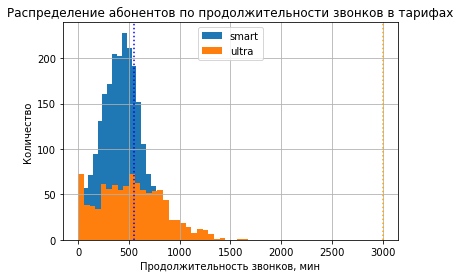

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2229.0,417.934948,190.313730,0.0,282.0,422.0,545.0,1435.0
ultra,985.0,526.623350,317.606098,0.0,284.0,518.0,752.0,1673.0


tariff
smart     36219.315784
ultra    100873.633397
Name: duration, dtype: float64

In [14]:
data_total.groupby('tariff')['duration'].plot(kind='hist',
    bins=30,
    legend=True,
    grid=True)

plt.axvline(x=550, color='b', ls=':', label='Лимит по smart') # в label даем название, которое отразится в легенде
plt.axvline(x=3000, color='orange', ls=':', label='Лимит по ultra')
plt.title('Распределение абонентов по продолжительности звонков в тарифах')
plt.xlabel('Продолжительность звонков, мин')
plt.ylabel('Количество')
plt.show()

display(data_total.groupby('tariff')['duration'].describe())
data_total.groupby('tariff')['duration'].var()

Распределение пользователнй в тарифе 'Smart' близко к нормальному с пиком около 400 минут в месяц. Здесь же видно, аномальное значение - кто-то говорил в месяц 1484 минут в месяц (около суток). Из данных выше видно, что средняя продолжительность разговора в тарифе Ультра выше на 30 %, при этом среднее количество звонков в этом тарифе также больше на 30%. 

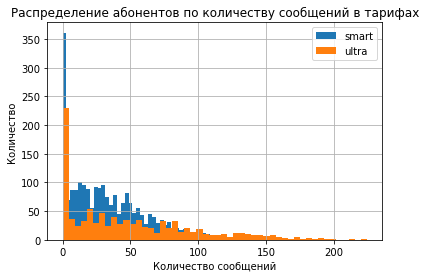

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0
ultra,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0


tariff
smart     796.812958
ultra    2285.266143
Name: messages_number, dtype: float64

In [15]:
data_total.groupby('tariff')['messages_number'].plot(kind='hist',
    bins=50,
    legend=True,
    grid=True)

plt.title('Распределение абонентов по количеству сообщений в тарифах')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество')
plt.show()

display(data_total.groupby('tariff')['messages_number'].describe())
data_total.groupby('tariff')['messages_number'].var()

Из графика видно, что большое количество пользователей в обоих тарифах не используют сообщения или используют крайне редко. Но есть и аномальные значения - кто отправил около 250 сообщений в месяц. Сообщениями также обмениваются больше владельцы тарифа "Ультра" на 48%.

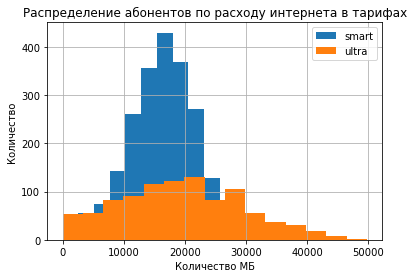

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2229.0,16208.386990,5870.476681,0.0,12643.01,16506.84,20042.93,38552.45
ultra,985.0,19468.805208,10087.170752,0.0,11770.26,19308.01,26837.69,49745.69


tariff
smart    3.446250e+07
ultra    1.017510e+08
Name: mb_used, dtype: float64

In [16]:
data_total.groupby('tariff')['mb_used'].plot(kind='hist',
    bins=15,
    legend=True,
    grid=True)

plt.title('Распределение абонентов по расходу интернета в тарифах')
plt.xlabel('Количество МБ')
plt.ylabel('Количество')
plt.show()

display(data_total.groupby('tariff')['mb_used'].describe())
data_total.groupby('tariff')['mb_used'].var()

Вновь распределение абонентов в тарифе "Smart" близко к нормальному. Также пользователи в тарифе Ультра в среднем тратят на 3 ГБ больше интернета, но заходят чаще пользователи тарифа Smart на 30%.

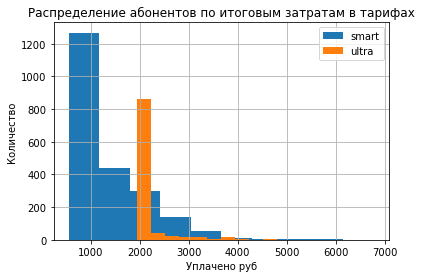

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2229.0,1289.973531,818.404367,550.0,550.0,1023.0,1750.0,6770.0
ultra,985.0,2070.152284,376.187114,1950.0,1950.0,1950.0,1950.0,4800.0


tariff
smart    669785.708006
ultra    141516.745079
Name: final_costs, dtype: float64

In [17]:
data_total.groupby('tariff')['final_costs'].plot(kind='hist',
    bins=10,
    legend=True,
    grid=True)

plt.title('Распределение абонентов по итоговым затратам в тарифах')
plt.xlabel('Уплачено руб')
plt.ylabel('Количество')
plt.show()

display(data_total.groupby('tariff')['final_costs'].describe())
data_total.groupby('tariff')['final_costs'].var()

## Проверка гипотез

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Нулевая гипотеза: средняя выручка пользователей тарифов "Ультра" и "Смарт" равны.

Альтернативная гипотеза: средняя выручка пользователей тарифов "Ультра" и "Смарт" не равны.

In [18]:
smart_tariff = data_total.query('tariff == "smart"')
ultra_tariff = data_total.query('tariff == "ultra"')

print(smart_tariff['final_costs'].count())
ultra_tariff['final_costs'].count()

2229


985

In [19]:
alpha = .05

results = st.ttest_ind(
    smart_tariff['final_costs'],
    ultra_tariff['final_costs'],
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Ответгаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  4.2606313931076085e-250
Ответгаем нулевую гипотезу


Вывод: Средняя выручка от пользователей тарифов "Ультра" и "Смарт" не равны.

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [20]:
moscow_data = data_total.query('city == "Москва"')
others_cities_data = data_total.query('city != "Москва"')

print(moscow_data['final_costs'].count())
others_cities_data['final_costs'].count()

611


2603

Нулевая гипотеза: средняя выручка от пользователей из Москвы равна средней выручке пользователей из других регионов.

Альтернативная гипотеза: средння выручка от пользователей из Москвы не равна средней выручке от пользователей из других регионов.

In [21]:
alpha = .05

results = st.ttest_ind(
    moscow_data['final_costs'],
    others_cities_data['final_costs'],
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Ответгаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Вывод: На основе того, что не получилось отвергнуть нулевую гипотезу, можно сделать вывод, что средняя выручка от пользователей из Москвы может быть равна средней выручке от пользователей из других регионов.

## Общий вывод

БОльшая часть абонентов выборки пользуются тарифом "Smart". Дополнительные траты несут абоненты обоих тарифов, но в Смарте их больше (скорее всего это связано с большей репрезентативностью), и максимальное значение оплаты в месяц также принадлежит абоненту этого тарифа. Средний уровень выручки не зависит от региона проживая абонента. Плата по тарифам отличается практически в 4 раза, поэтому выручка от пользователей разных тарифов не равна.